In [1]:
from commonfunctions import *
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import rgba2rgb
from commonfunctions import *
import numpy as np
import os

## Function to read all images in a directory

In [2]:
def get_fname_images_tuple(directory):
    fnames = os.listdir(directory)
    fnames.sort(key=lambda x:int(x[1:-4]))
    to_return = []
    for fn in fnames:
        if fn[-3:] == 'jpg':
            path = os.path.join(directory, fn)
            gray_scale_image = (rgb2gray(io.imread(path)) * 255).astype(np.uint8)
            to_return.append((fn, gray_scale_image))
        else:
            print('This file has been skipped', fn)
    return to_return

## Local Binary Patterns

In [61]:
def LBP(img):
    numPoints = 16
    radius = 2

    # lbp2 = local_binary_pattern(img, numPoints, radius, method="nri_uniform").astype(int)
    lbp2 = local_binary_pattern(img, numPoints, radius, method="nri_uniform").astype(int)
    
    cts = np.zeros(numPoints * (numPoints - 1) + 3)
    # cts = np.zeros(18)
    def f2(v):
        cts[v] += 1

    f22 = np.vectorize(f2)
    f22(lbp2)
    return cts

## Read Males files

In [54]:
males = get_fname_images_tuple('Males/Males')

## Read Females files

In [55]:
females = get_fname_images_tuple('Females/Females')

## binary image

In [62]:
def thresh(image, th):
    image[image>th] = 255
    image[image<th] = 0

In [63]:
from PIL import Image

In [64]:
DF = 4 # Divide Factor

## Try on one image

In [65]:
img = males[10][1].copy()
img = np.array(Image.fromarray(img).resize((img.shape[0]//DF, img.shape[1]// DF)))
thresh(img, 150)

In [66]:
cts = LBP(img)
print(cts.shape)
io.imsave('output.jpg',img)
np.savetxt('features.csv', cts.reshape(1, len(cts)), fmt='%d',delimiter=', ')

(243,)


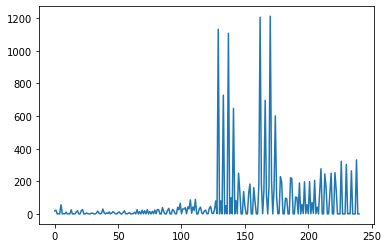

In [67]:
plt.plot(np.arange(len(cts)-2), cts[0:-2])

In [68]:
# m = males[10][1].copy()
# print(males[2][0])
th = 150
malesLBP = []
open("males.csv", "w").close()
f=open('males.csv','a')
for i in range(len(males)):
    m = males[i][1].copy()
    img = np.array(Image.fromarray(m).resize((m.shape[0]//DF, m.shape[1]// DF)))
    thresh(img, th)
    cts = LBP(img)
    malesLBP.append(cts.reshape((1, len(cts))))
    np.savetxt(f, cts.reshape(1, len(cts)), fmt='%d',delimiter=', ')

    # malesthresh.append(cts.reshape(1, len(cts)))
    
# io.imsave('output.jpg',m)

In [69]:
f.close()

In [70]:
th = 150
femalesLBP = []
open("females.csv", "w").close()
f=open('females.csv','a')
for i in range(len(females)):
    fem = females[i][1].copy()
    img = np.array(Image.fromarray(fem).resize((fem.shape[0]//DF, fem.shape[1]// DF)))
    thresh(img, th)
    cts = LBP(img)
    femalesLBP.append(cts.reshape((1, len(cts))))
    np.savetxt(f, cts.reshape(1, len(cts)), fmt='%d',delimiter=', ')

In [71]:
f.close()

M226.jpg


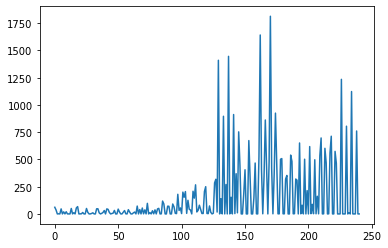

In [72]:
m = males[225][1].copy()
print(males[225][0])
img = np.array(Image.fromarray(m).resize((m.shape[0]//DF, m.shape[1]// DF)))
thresh(img, th)
io.imsave('output.jpg', img)
cts = LBP(img)
plt.plot(np.arange(len(cts)-2), cts[0:-2])

In [73]:
for i in range(len(females)):
    if(females[i][0]=='F115.jpg'):
        print(i)
        break

112


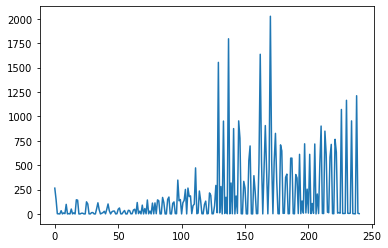

In [74]:
fem = females[112][1].copy()
img = np.array(Image.fromarray(fem).resize((fem.shape[0]//DF, fem.shape[1]// DF)))
thresh(img, th)
io.imsave('output.jpg', img)
cts = LBP(img)
plt.plot(np.arange(len(cts)-2), cts[0:-2])

In [75]:
for el in malesLBP:
    print(el.shape)

(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(1, 243)
(

In [77]:
malesLBP2 = np.array(malesLBP).reshape((len(malesLBP), malesLBP[0].shape[1])).astype(int)
femalesLBP2 = np.array(femalesLBP).reshape((len(femalesLBP), malesLBP[0].shape[1])).astype(int)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [398]:
taken = len(femalesLBP2)
print(taken)
print(femalesLBP2.shape)
X = np.append(malesLBP2[0:taken], femalesLBP2, axis=0)
y = np.append(np.repeat(1, taken), np.repeat(0, taken))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# X_rem = malesLBP2[taken:]
# print(len(X_rem))
# y_rem = np.repeat(1, len(X_rem))
# X_test = np.append(X_test, X_rem, axis= 0)
# y_test = np.append(y_test, y_rem, axis= 0)

# mtrain, mtest, mytrain, mytest = train_test_split(malesLBP2, np.repeat(1, len(malesLBP2)), test_size=0.3)
# ftrain, ftest, fytrain, fytest = train_test_split(femalesLBP2, np.repeat(0, len(femalesLBP2)), test_size=0.3)
# X_train = np.append(mtrain, ftrain, axis=0)
# X_test = np.append(mtest, ftest, axis=0)
# y_train = np.append(mytrain, fytrain, axis=0)
# y_test = np.append(mytest, fytest, axis=0)

131
(131, 243)


In [399]:
clf = svm.SVC(C=10000, kernel='rbf')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [400]:
np.count_nonzero(pred==y_test)/len(y_test)*100

74.07407407407408

### Last 4 Cells 29 times

In [450]:
acc = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    clf = svm.SVC(C=2000, kernel='rbf')
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc.append(np.count_nonzero(pred==y_test)/len(y_test)*100)

acc = np.array(acc)
# print(acc)
print(np.max(acc))
print(np.min(acc))
print(np.average(acc))

88.88888888888889
51.85185185185185
68.22222222222221


In [390]:
print(pred)
print(y_test)

[1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0]
[0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]


In [200]:
import csv

In [201]:
def read_data():
    data = None
    # TODO 1: Read the file 'data.csv' into the variable data.
    #        Convert the matrix data into numpy array and make sure that the values in data is float and not strings.
    # Hint: You already implemented it in Lab 3.
    # Hint: use data = np.asarray(data)
    # Note: data contains both the training data together with labelled classes.
    file = open('data.csv')
    csvreader = csv.reader(file)
    rows = []
    for row in csvreader:
        rows.append(row)
    file.close()
    data = np.array(rows).astype(float)
    return data